In [1]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from transformers import pipeline

D:\anaconda\envs\Visual\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = "D:/data cleaning/Chrome Driver/chromedriver-win64/chromedriver.exe"
s = Service(path)

# Setup Chrome options
options = Options()

# Start browser
driver = webdriver.Chrome(options=options,service=s)
driver.get("https://x.com")  # Load domain first to set base cookies

# Wait a bit for page load
time.sleep(3)

cookies = [
    {"name": "auth_token", "value": "1d0077e2bbdab26848b2a715b548065f62a30170"},
    {"name": "ct0", "value": "2397af26f2088e7b23d3022914420f647d4e24e1783a992185f9cda71e195788ddd7daa744c6f4541ae1181c232e50591dd7a823f734850b4c9c65c59da26088b8f57577a35dca3dafa74856be28fd6a"},
    {"name": "twid", "value": "u%3D1151873054596710400"},
    {"name": "guest_id", "value": "v1%3A173765736390788684"},
]

# Add cookies to the browser
for cookie in cookies:
    driver.add_cookie(cookie)

driver.get("https://x.com/home")
time.sleep(1)
driver.get("https://x.com/explore")
time.sleep(3)


In [3]:
box = driver.find_element(By.CSS_SELECTOR, 'input[aria-label="Search query"]')
box.send_keys("indian politics")
box.send_keys(Keys.RETURN)
time.sleep(5)

In [4]:
for _ in range(5):
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
    time.sleep(4)

In [5]:
data = []
tweets = driver.find_elements(By.XPATH, '//article[@data-testid="tweet"]')
print(f"Found {len(tweets)} tweets")
for tweet in tweets:
    content = tweet.text
    try:
        lines = content.splitlines()  
        data.append(lines)
    except:
        data.append(np.nan)


Found 7 tweets


In [6]:
data = [' '.join(tweet[4:-3]) for tweet in data if isinstance(tweet, list) and len(tweet) > 4]

In [7]:
dic = {}
p = pipeline("sentiment-analysis")
for d in data:
    dic[d] = p(d)[0]['label']
    print(f"{d}:{dic[d]}")
    print('-'*15)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Device set to use cuda:0


The architect of 21st-century India, Rajiv Gandhi, is rightfully hailed as the 'Father of Information Technology’. A leader par excellence, his vision left an indelible mark on Indian politics.  Our heartfelt tributes to India’s youngest PM, who changed the country forever. 190:POSITIVE
---------------
Replying to  @SarkarSupriyo India can not be allowed to continue to alter professional cricket indefinitely. :NEGATIVE
---------------
On his birth anniversary, we pay tribute to Om Mehta, Former Union Minister & an important figure in Indian politics, who rose from the Himalayas & made a notable contribution towards India. 8:POSITIVE
---------------
We feel very strongly that Indian women are not participating in the political system the way they should be. The single biggest act to help them participate in politics was carried out by Congress party, i.e., 33% reservation in Panchayati Raj which was a game changer.  Also, Show more 1:17 65:NEGATIVE
---------------
In loving memory of a 

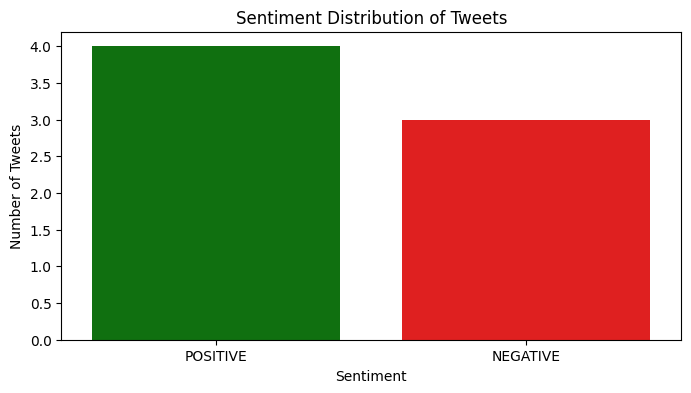

In [8]:
df = pd.DataFrame(list(dic.items()), columns=['tweet', 'sentiment'])

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette={'POSITIVE': 'green', 'NEGATIVE': 'red'}, legend=False)
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()